In [1]:
import numpy as np
import pandas as pd
import datetime

file = 'center.csv'

#df = pd.DataFrame((pd.read_csv(file,header=0, delimiter=',')),columns=[float, datetime])

raw_data = pd.read_csv(file,header=0, delimiter=',')
data = np.array(raw_data)


#df = pd.DataFrame(data[:,0:3], columns = ['usage', 'supply','temp'], index=data[:,3], dtype=float)
df = pd.DataFrame(data, columns = ['usage', 'supply','temp','date'])
df['supply'] = df['supply'].apply(pd.to_numeric)
df['usage'] = df['usage'].apply(pd.to_numeric)
df['temp'] = df['temp'].apply(pd.to_numeric)
df['date'] = df['date'].apply(pd.to_datetime)
#df.index = pd.to_datetime(df.index)



#print(df.ix[:, "max_supply"].isnull()) 

print(df)
df.info()

     usage  supply  temp       date
0    763.5   869.9  31.1 2016-10-01
1    738.5   828.8  32.9 2016-10-02
2    820.0   950.2  31.3 2016-10-03
3    850.6   972.5  31.4 2016-10-04
4    835.6   966.0  31.7 2016-10-05
5    835.6   988.2  30.2 2016-10-06
6    859.0   960.3  28.2 2016-10-07
7    756.9   889.5  28.5 2016-10-08
8    684.7   856.8  27.5 2016-10-09
9    711.8   879.5  28.4 2016-10-10
10   827.2   966.8  30.0 2016-10-11
11   797.1   938.1  30.1 2016-10-12
12   795.6   931.1  30.8 2016-10-13
13   783.2   947.2  31.0 2016-10-14
14   734.3   892.5  32.1 2016-10-15
15   714.4   931.7  32.5 2016-10-16
16   848.3  1033.3  33.1 2016-10-17
17   842.1  1014.6  31.4 2016-10-18
18   843.4  1033.2  31.6 2016-10-19
19   855.9  1030.2  33.1 2016-10-20
20   854.4  1079.6  32.1 2016-10-21
21   765.6   894.2  32.5 2016-10-22
22   726.9   869.0  32.5 2016-10-23
23   834.8   999.3  32.2 2016-10-24
24   821.2   952.3  31.6 2016-10-25
25   854.7  1057.6  32.1 2016-10-26
26   854.4  1090.4  31.6 201

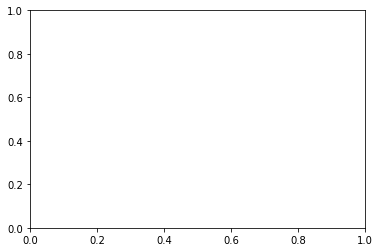

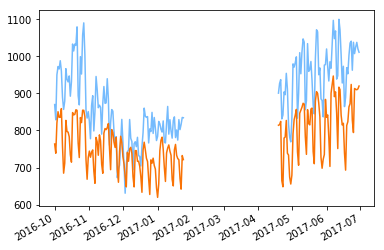

In [3]:
import matplotlib.pyplot as plt
df['usage'].fillna(0, inplace=True)
df['supply'].fillna(0, inplace=True)

Q = np.array(df['supply'])
C = np.array(df['usage'])


fig, ax1 = plt.subplots()

for i in range(0, len(Q)):
    if Q[i]==0:
        Q[i] = np.nan
for i in range(0, len(C)):
    if C[i]==0:
        C[i] = np.nan

ax1.plot(df['date'], Q,label="supply",color='xkcd:sky blue')
ax1.plot(df['date'], C,label="usage",color='xkcd:orange')


fig.autofmt_xdate()
plt.show()

In [2]:
df['usage'].fillna(0, inplace=True)
df['supply'].fillna(0, inplace=True)

Q = np.array(df['supply'])
C = np.array(df['usage'])

#for i in range(len(Q)):
 #  if Q[i]== np.nan:
 #       Q[i] = 0
    

print(C)

[ 763.5  738.5  820.   850.6  835.6  835.6  859.   756.9  684.7  711.8
  827.2  797.1  795.6  783.2  734.3  714.4  848.3  842.1  843.4  855.9
  854.4  765.6  726.9  834.8  821.2  854.7  854.4  837.4  721.5  668.3
  726.6  744.3  727.7  741.8  747.4  690.7  657.3  781.2  769.1  733.1
  788.1  772.2  708.7  684.4  792.8  805.2  802.2  807.6  818.6  751.9
  694.1  802.4  794.4  768.6  754.2  781.5  693.2  660.2  743.5  784.3
  767.5  729.3  709.1  676.2  647.7  740.7  716.9  750.1  754.4  738.
  675.2  647.6  745.6  745.5  716.7  716.9  703.7  675.6  633.1  747.3
  768.3  748.1  725.1  716.   669.2  627.2  720.7  711.6  725.2  705.4
  695.7  645.6  619.4  655.6  745.2  773.4  781.9  749.5  700.4  662.4
  739.4  752.6  760.9  744.1  733.   667.6  650.3  748.   762.3  732.8
  724.1  721.   670.4  641.6  732.3  721.3    0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.    

613.797802198


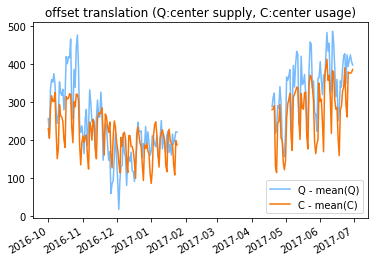

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

Q_mean = np.mean(Q)
C_mean = np.mean(C)

print(Q_mean)
Q_trans = Q.copy()
C_trans = C.copy()


for i in range(0, len(Q)):
    if Q_trans[i]>0:
      Q_trans[i] = Q_trans[i]-Q_mean
    else:
        Q_trans[i] = np.nan
for i in range(0, len(C)):
    if C_trans[i]>0:
      C_trans[i] = C_trans[i]-C_mean
    else:
        C_trans[i] = np.nan
    
#print(Q_trans)

ax1.plot(df['date'], Q_trans,label="Q - mean(Q)",color='xkcd:sky blue')
ax1.plot(df['date'], C_trans,label="C - mean(C)",color='xkcd:orange')
plt.title('offset translation (Q:center supply, C:center usage)')
ax1.legend()
fig.autofmt_xdate()
plt.show()
fig.savefig('offset_translation.png', dpi=fig.dpi)

In [13]:
import math

Q_trans[np.isnan(Q_trans)] = 0
C_trans[np.isnan(C_trans)] = 0
print(C_trans)
dist = math.sqrt(sum([(a-b)**2 for a,b in zip(Q_trans,C_trans)]))
print(dist)

[ 229.25567766  204.25567766  285.75567766  316.35567766  301.35567766
  301.35567766  324.75567766  222.65567766  150.45567766  177.55567766
  292.95567766  262.85567766  261.35567766  248.95567766  200.05567766
  180.15567766  314.05567766  307.85567766  309.15567766  321.65567766
  320.15567766  231.35567766  192.65567766  300.55567766  286.95567766
  320.45567766  320.15567766  303.15567766  187.25567766  134.05567766
  192.35567766  210.05567766  193.45567766  207.55567766  213.15567766
  156.45567766  123.05567766  246.95567766  234.85567766  198.85567766
  253.85567766  237.95567766  174.45567766  150.15567766  258.55567766
  270.95567766  267.95567766  273.35567766  284.35567766  217.65567766
  159.85567766  268.15567766  260.15567766  234.35567766  219.95567766
  247.25567766  158.95567766  125.95567766  209.25567766  250.05567766
  233.25567766  195.05567766  174.85567766  141.95567766  113.45567766
  206.45567766  182.65567766  215.85567766  220.15567766  203.75567766
  140.

In [18]:
Q_std = np.std(Q)
C_std = np.std(C)
Q_as = (Q_trans)/Q_std
C_as = (C_trans)/C_std

dist_as = math.sqrt(sum([(a-b)**2 for a,b in zip(Q_as,C_as)]))
print(dist_as)

print(Q_as)

1.8720653776787086
[ 0.61290454  0.5145439   0.80507874  0.85844717  0.84289135  0.89602046
  0.82925009  0.65981132  0.58155358  0.63587929  0.84480591  0.77612099
  0.75936857  0.79789913  0.66699093  0.76080449  1.00395391  0.95920102
  1.00371459  0.99653498  1.11475921  0.67105938  0.61075066  0.92258501
  0.81010447  1.06210874  1.1406058   0.93502967  0.5770065   0.52555263
  0.56743369  0.50616769  0.39225123  0.60787882  0.67010209  0.44250849
  0.56767301  0.79430933  0.70887198  0.59256232  0.6088361   0.59567348
  0.42192695  0.61912687  0.72945353  0.62104143  0.62391328  0.77995011
  0.64999919  0.35037018  0.49587692  0.58035698  0.57054485  0.44298713
  0.35013086  0.40517452  0.14048627  0.20270955  0.22065857  0.3707124
  0.51717642  0.36999444  0.22257314  0.04021107  0.2232911   0.30968573
  0.3175833   0.51621914  0.39512307  0.37406289  0.1914615   0.36042163
  0.37286628  0.34079736  0.4013454   0.28264253  0.27857409  0.21611149
  0.34103668  0.43173908  0.58992

In [2]:
from scipy import signal

ImportError: DLL load failed: 找不到指定的模組。

In [3]:
import scipy.fftpack

ImportError: DLL load failed: 找不到指定的模組。

In [4]:
import scipy

In [5]:
from scipy import signal

ImportError: DLL load failed: 找不到指定的模組。